Fake_News_Classifier

In [31]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [32]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
df=pd.read_csv("/content/drive/MyDrive/fake-news/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [34]:
df.dropna()
df = df.reset_index(drop=True)
x = df.drop('label', axis=1)
y = df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [35]:
x['title'][3]

'15 Civilians Killed In Single US Airstrike Have Been Identified'

**Cleaning and Preprocessing**

In [37]:
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()
x['title']=x['title'].replace(np.nan, '')
corpus = []
for i in range(0, len(x)):
    data = re.sub('[^a-zA-Z]', ' ', x['title'][i])
    data = data.lower()
    data = data.split()
    data = [stemmer.stem(word) for word in data if not word in stopwords.words('english')]
    data = [lemmatizer.lemmatize(word) for word in data if not word in stopwords.words('english')]
    data = ' '.join(data)
    corpus.append(data)

Countvectorizer Model

In [38]:
# Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()

In [40]:
x.shape

(20800, 5000)

Train_Test_Split

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [41]:
cv.get_feature_names()[:15]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi']

Train Model and predict

MultinomialNB Algorithm

In [45]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)
y_pred = spam_detect_model.predict(X_test)

Result

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("confution matrix:",cm)
print("accuracy:   %0.3f" % score)
print(cr)

confution matrix: [[3018  372]
 [ 478 2996]]
accuracy:   0.876
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      3390
           1       0.89      0.86      0.88      3474

    accuracy                           0.88      6864
   macro avg       0.88      0.88      0.88      6864
weighted avg       0.88      0.88      0.88      6864



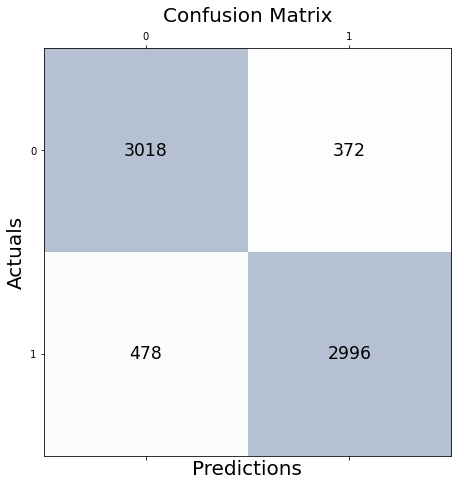

In [61]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix', fontsize=20)
plt.show()